### Visualizing Data in Python
#### Tables, Histograms, Boxplots, and Slicing for Statistics

When working with a new dataset, one of the most useful things to do is to begin to visualize the data. By using tables, histograms, box plots, and other visual tools, we can get a better idea of what the data may be trying to tell us, and we can gain insights into the data that we may have not discovered otherwise.

Today, we will be going over how to perform some basic visualisations in Python, and, most importantly, we will learn how to begin exploring data from a graphical perspective.

In [2]:
# We first need to import the packages that we will be using
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots

# Load in the data set
tips_data = sns.load_dataset("tips")

#### Visualizing the Data - Tables
When you begin working with a new data set,  it is often best to print out the first few rows before you begin other analysis. This will show you what kind of data is in the dataset, what data types you are working with, and will serve as a reference for the other plots that we are about to make. 

In [3]:
# Print out the first few rows of the data
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


#### Describing Data
Summary statistics, which include things like the mean, min, and max of the data, can be useful to get a feel for how large some of the variables are and what variables may be the most important. 

In [4]:
# Print out the summary statistics for the quantitative variables
tips_data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


#### Creating a Histogram

After we have a general 'feel' for the data, it is often good to get a feel for the shape of the distribution of the data.

/opt/conda/envs/python2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


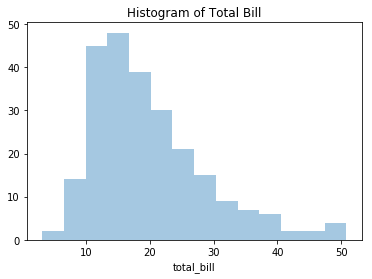

In [6]:
# histogram = distribution plot = distplot
# kde = False => without probability density function curve; otherwise by default 'kde=True'
# kde = kernel density estimation

# Plot a histogram of the total bill
sns.distplot(tips_data["total_bill"], kde = False).set_title("Histogram of Total Bill")
plt.show()

/opt/conda/envs/python2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


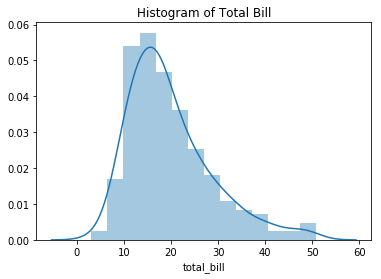

In [7]:
#histogram of total bill with kde
sns.distplot(tips_data["total_bill"]).set_title("Histogram of Total Bill with KDE")
plt.show()

/opt/conda/envs/python2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


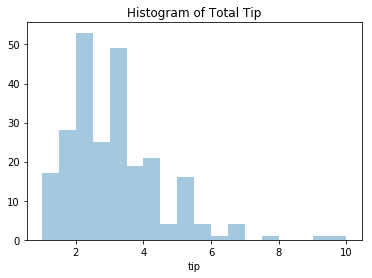

In [8]:
# Plot a histogram of the Tips only
sns.distplot(tips_data["tip"], kde = False).set_title("Histogram of Total Tip")
plt.show()

/opt/conda/envs/python2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/opt/conda/envs/python2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


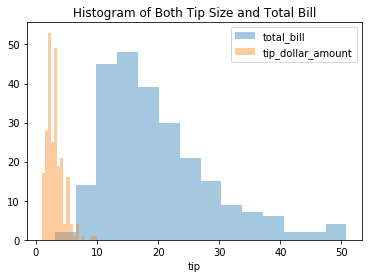

In [16]:
# Plot a histogram of both the total bill and the tips'
sns.distplot(tips_data["total_bill"], kde = False, label ='total_bill')
sns.distplot(tips_data["tip"], kde = False, label ='tip_dollar_amount').set_title("Histogram of Both Tip Size and Total Bill")
plt.legend()
plt.show()

#try not to plot 1 histogram, then another histogram within the same viz'
#without the legend

#### Creating a Boxplot

Boxplots do not show the shape of the distribution, but they can give us a better idea about the center and spread of the distribution as well as any potential outliers that may exist. Boxplots and Histograms often complement each other and help an analyst get more information about the data

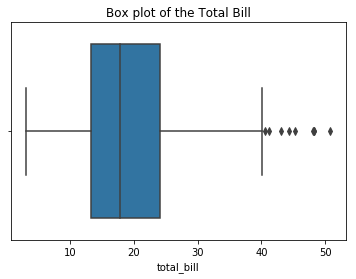

In [17]:
# Create a boxplot of the total bill amounts
sns.boxplot(tips_data["total_bill"]).set_title("Box plot of the Total Bill")
plt.show()

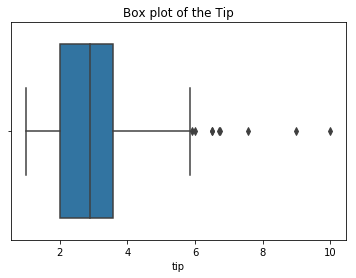

In [18]:
# Create a boxplot of the tips amounts
sns.boxplot(tips_data["tip"]).set_title("Box plot of the Tip")
plt.show()

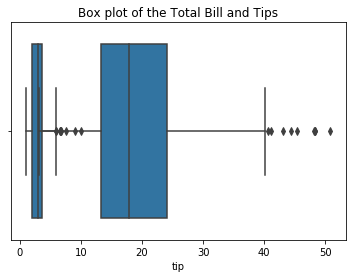

In [20]:
# Create a boxplot of the tips and total bill amounts - do not do it like this
sns.boxplot(tips_data["total_bill"])
sns.boxplot(tips_data["tip"]).set_title("Box plot of the Total Bill and Tips")
plt.show()

#also, try not to do this plot where we do a boxplot of 2 datasets within the same sub-plot

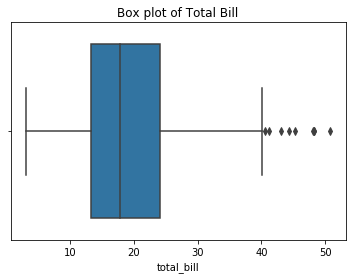

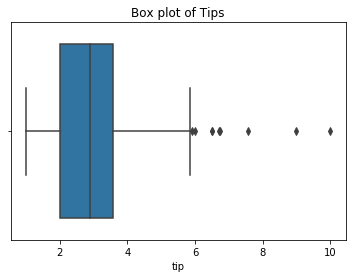

In [21]:
# Create a boxplot of the tips and total bill amounts - SEPARATELY
sns.boxplot(tips_data["total_bill"]).set_title("Box plot of Total Bill")
plt.show()
sns.boxplot(tips_data["tip"]).set_title("Box plot of Tips")
plt.show()

#### Creating Histograms and Boxplots Plotted by Groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Using graphs, we can see if there is a difference between the tipping amounts of smokers vs. non-smokers, if tipping varies according to the time of the day, or we can explore other trends in the data as well.

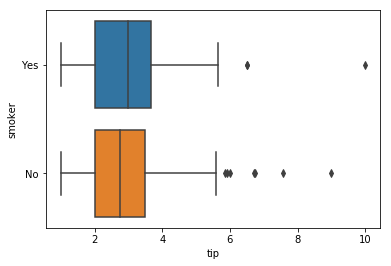

In [22]:
# Create a boxplot and histogram of the tips grouped by smoking status
sns.boxplot(x = tips_data["tip"], y = tips_data["smoker"])
plt.show()

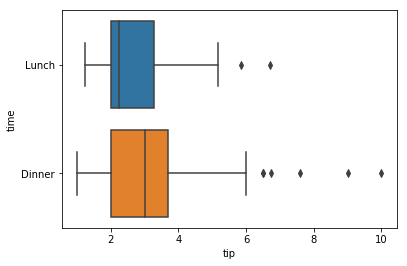

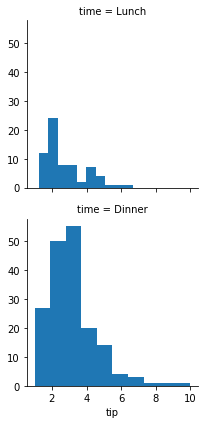

In [23]:
# Create a boxplot and histogram of the tips grouped by time of day
sns.boxplot(x = tips_data["tip"], y = tips_data["time"])


# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
#create a multi-plot grid, i.e. a FacetGrid, 1 for each value in the "time" categorical variable
g = sns.FacetGrid(tips_data, row = "time")
g = g.map(plt.hist, "tip")
plt.show()

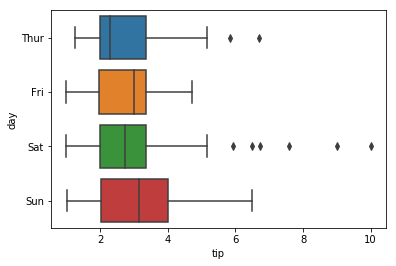

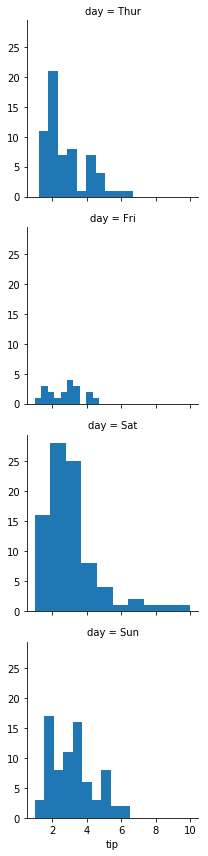

In [24]:
# Create a boxplot and histogram of the tips grouped by the day
sns.boxplot(x = tips_data["tip"], y = tips_data["day"])

g = sns.FacetGrid(tips_data, row = "day")
g = g.map(plt.hist, "tip")
plt.show()